# Лабораторная работа №2
###Глобальная оптимизация

#Постановка задачи


1. Найти оптимумы тестовых функций лабы 1 с помощью двух алгоритмов pygmo
2. Сконструировать нефункциональную (алгоритмическую) проблему оптимизации и решить в pygmo











In [49]:
!pip install pygmo
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Функция Химмельблау

In [50]:
import numpy as np
def himmelblau(x: np.array, y: np.array) -> float:
  return (x**2 + y-11)**2 + (x+y**2-7)**2

In [51]:
import pygmo as pg
class Himelblau():
  @staticmethod
  def fitness(x):
        return [(x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])
    
  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

In [52]:
himelblau = Himelblau()

In [53]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Himelblau())
print(prob)

Problem name: <class '__main__.Himelblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [54]:
pop = pg.population(prob, 100)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.00029624]


In [55]:
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = himmelblau(X, Y)
     

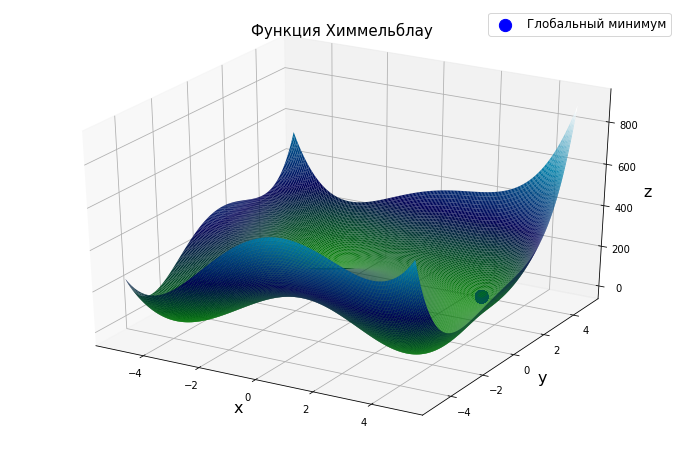

In [56]:
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.gca(projection='3d')
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='ocean', linewidth=1, antialiased=True)
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
ax1.set_zlabel('z', fontsize=16)
ax1.set_title('Функция Химмельблау', fontsize=15)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax1.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax1.legend(fontsize=12)
plt.show()

In [57]:
algo = pg.algorithm(pg.sade(gen=1000))
prob = pg.problem(Himelblau())
print(prob)

Problem name: <class '__main__.Himelblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [58]:

pop = pg.population(prob, 100)
pop = algo.evolve(pop)
print(pop.champion_f)

[4.55772129e-10]


In [59]:
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = himmelblau(X, Y)

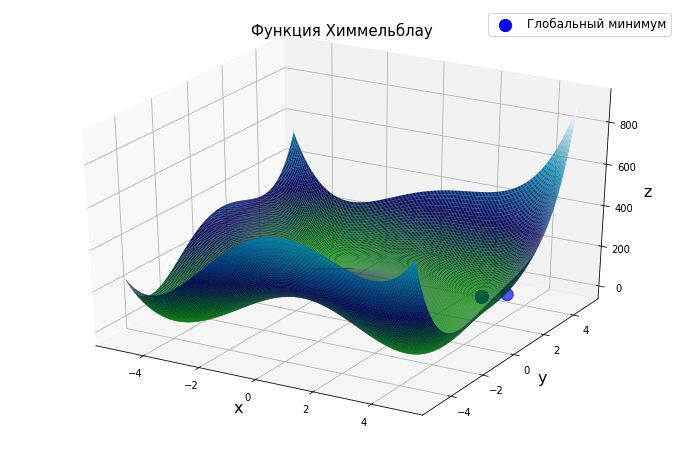

In [60]:
fig1 = plt.figure(figsize=(12,8))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='ocean', linewidth=1, antialiased=True)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Химмельблау', fontsize=15)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

#Функция Бута

In [61]:
def booth(x: np.array, y: np.array) -> float:
  return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

In [62]:
class Booth():
  @staticmethod
  def fitness(x):
      return [(x[0] + 2 * x[1]  - 7) ** 2 + (2 * x[0]  + x[1]  - 5) ** 2]

  @staticmethod
  def get_bounds():
      return ([-10, -10], [10, 10])
    
  @staticmethod
  def gradient(self, x):
      return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

In [63]:
hi = Booth()

print(hi.fitness)

<function Booth.fitness at 0x7f437b06ad30>


In [64]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Booth())
print(prob)

Problem name: <class '__main__.Booth'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [65]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[1.50425223e-06]


In [66]:
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = booth(X, Y)

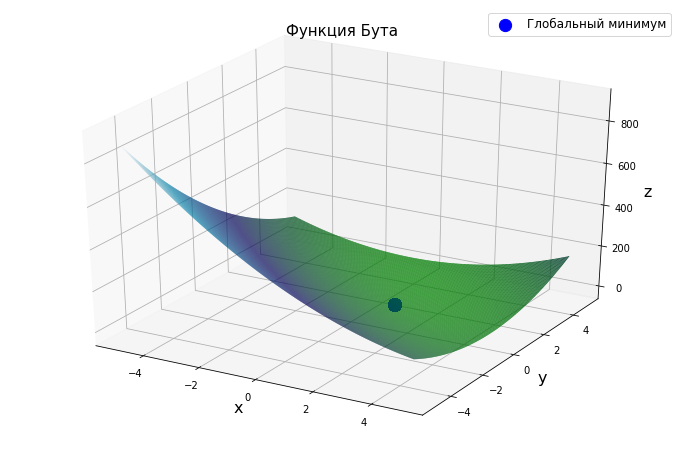

In [67]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='ocean', linewidth=1, antialiased=True)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Бута', fontsize=15)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

In [68]:
algo = pg.algorithm(pg.sade(gen=1000))
prob = pg.problem(Booth())
print(prob)

Problem name: <class '__main__.Booth'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [69]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[1.58034494e-15]


In [70]:
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = booth(X, Y)

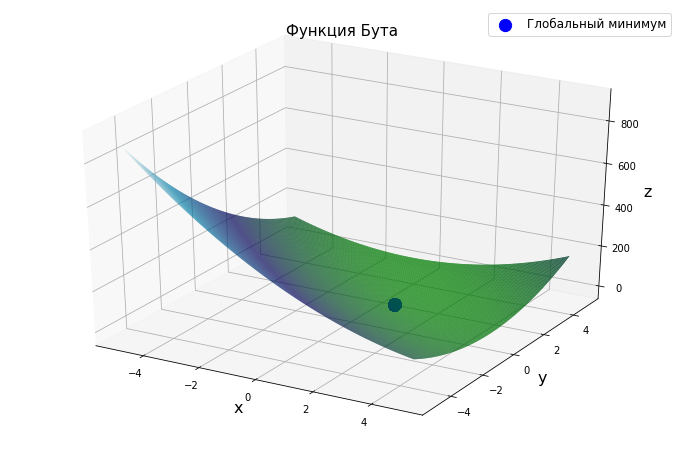

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='ocean', linewidth=1, antialiased=True)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Бута', fontsize=15)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

###Сконструировать алгоритмическую проблему оптимизации и решить ее при помощи библиотеки pygmo. Поиск глобального минимума по ландшафту яркости изображения (нахождение самой темной точки изображения)

(530, 721)

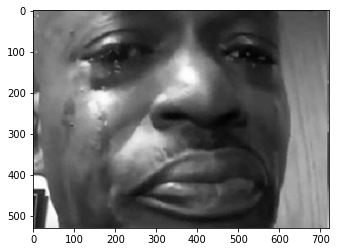

In [72]:
import cv2
img = cv2.imread('/content/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")
img.shape

In [73]:
class Image:
    def __init__(self, img):
        self.img = img
        
    def fitness(self, x):
        return [self.img[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.img.shape[0]-1, self.img.shape[1]-1])

    def get_glob_min(self):
      return np.array([1, 1, np.amin(img)])

In [74]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Image(img))
print(prob)

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [529, 720]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [75]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[22.]


In [76]:
x = pop.get_x()[pop.best_idx()]

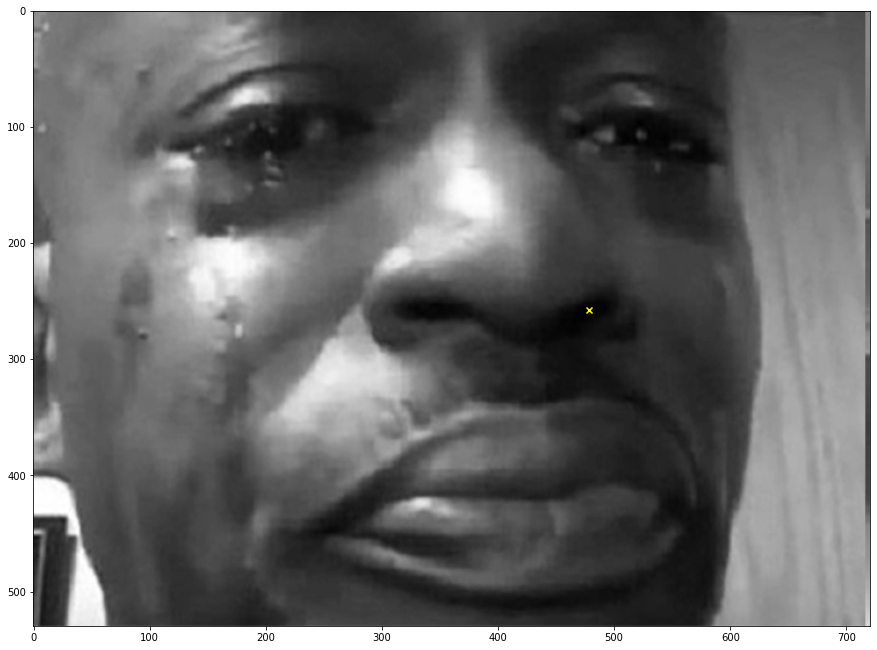

In [77]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes
plt.imshow(img, cmap="gray")
plt.scatter(x[1], x[0], marker='x', c="yellow")